In [92]:
import numpy as np
import pandas as pd
import os

In [93]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATA SCIENCE/Data Mining/Clasificación/churn.csv")

# Análisis Exploratorio de Datos (EDA)

In [95]:
data.head(5)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


Nombres de las variables (columnas):

In [96]:
data.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn'],
      dtype='object')

Tipos de los datos almacenados en cada variable:

In [97]:
data.dtypes

State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan         object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn              object
dtype: object

**Decripción** estadística de los datos

In [98]:
descripcion_data = data.describe(include="all").T
print(descripcion_data)

                 count unique       top  freq        mean        std    min  \
State             3333     51        WV   106         NaN        NaN    NaN   
Account Length  3333.0    NaN       NaN   NaN  101.064806  39.822106    1.0   
Area Code       3333.0    NaN       NaN   NaN  437.182418   42.37129  408.0   
Phone             3333   3333  382-4657     1         NaN        NaN    NaN   
Int'l Plan        3333      2        no  3010         NaN        NaN    NaN   
VMail Plan        3333      2        no  2411         NaN        NaN    NaN   
VMail Message   3333.0    NaN       NaN   NaN     8.09901  13.688365    0.0   
Day Mins        3333.0    NaN       NaN   NaN  179.775098  54.467389    0.0   
Day Calls       3333.0    NaN       NaN   NaN  100.435644  20.069084    0.0   
Day Charge      3333.0    NaN       NaN   NaN   30.562307   9.259435    0.0   
Eve Mins        3333.0    NaN       NaN   NaN  200.980348  50.713844    0.0   
Eve Calls       3333.0    NaN       NaN   NaN  100.1

Valores perdidos

In [99]:
data.isnull().sum()

State             0
Account Length    0
Area Code         0
Phone             0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn             0
dtype: int64

In [100]:
if  not data.isnull().any().any():
  print("No hay valores nulos")

No hay valores nulos


In [101]:
data.isnull().any().any()

False

Tras comprobar que no existen valores perdidos analizamos las variables.
- El objetivo es determinar si todas las variables son utiles para la modelizacion.
- Hay una serie de variables que no nos proporcionan informacion.
- El estado en el que vive un cliente no aporta informacion sobre su comportamiento.


In [102]:
# Están los 51 estados de EEUU
len(data['State'].value_counts())

51

- Lo mismo ocurre con los codigos identifcativos y con el número de telefono.
- Eliminamos esas variables

In [103]:
# Ejecutar esta celda sólo una vez. La segunda vez daria error por no existir las columnas ya eliminadas
del data['State']
del data['Account Length']
del data['Area Code']
del data['Phone']

- El resto de las variables pueden ser relevantes para el análisis.
- Tenemos variables numéricas y variables categóricas.
- Las variables categóricas deben ser **binominalizadas**.
- En este caso dado que las variables solo toman dos opciones se puede hacer "a mano".

Crear una nueva columna de ceros

In [104]:
data.loc[:, "IntPlan"] = 0

Si tiene Plan Internacional -> 1

In [105]:
data.loc[data["Int'l Plan"] == "yes", "IntPlan"] = 1

In [106]:
data = data.drop("Int'l Plan", axis = 1)
data.head()

,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn,IntPlan
0,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.,0
1,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.,0
2,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.,0
3,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.,1
4,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.,1


Si tuviesemos más categorí­as, hacer esto a mano seria mucho trabajo.<br>
Con la funcion *get_dummies* creamos un nuevo conjunto de datos en el que cada posible opción de una variable pasa a ser una variable dummy.

In [107]:
vmailplan2 = pd.get_dummies(data['VMail Plan'])

In [108]:
print(vmailplan2)

      no  yes
0      0    1
1      0    1
2      1    0
3      1    0
4      1    0
...   ..  ...
3328   0    1
3329   1    0
3330   1    0
3331   1    0
3332   0    1

[3333 rows x 2 columns]


In [109]:
churn2 = pd.get_dummies(data['Churn'])
print(churn2)

      False.  True.
0          1      0
1          1      0
2          1      0
3          1      0
4          1      0
...      ...    ...
3328       1      0
3329       1      0
3330       1      0
3331       1      0
3332       1      0

[3333 rows x 2 columns]


Una vez que ya hemos hecho la transformacion juntamos todas las variables en un data frame.

In [111]:
datosfinal = pd.concat([data, vmailplan2["yes"], churn2["True."]], axis=1)

In [112]:
datosfinal.head()

,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn,IntPlan,yes,True.
0,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.,0,1,0
1,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.,0,1,0
2,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.,0,0,0
3,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.,1,0,0
4,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.,1,0,0


In [113]:
del datosfinal['Churn']
del datosfinal['VMail Plan']

In [114]:
datosfinal = datosfinal.rename(columns={'yes': 'VmailPlan'})
datosfinal = datosfinal.rename(columns={'True.': 'Churn'})

In [116]:
datosfinal['Churn'].mean()

0.14491449144914492

In [24]:
datosfinal.head(10)

,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,IntPlan,VmailPlan,Churn
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1,0
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1,0
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1,0,0
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1,0,0
5,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,1,0,0
6,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0,1,0
7,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,1,0,0
8,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0,0,0
9,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,1,1,0


# Primera separación Train-Test

Para esta primera modelizacion hacemos la siguiente particion:
- Para entrenar el algoritmo: 3000 observaciones
- Para testear el algoritmo 333 observaciones

In [25]:
train_data = datosfinal[:3000]
test_data = datosfinal[3000:]

In [26]:
train_data_X = train_data.drop(['Churn'], axis=1)
train_data_y = train_data['Churn']

In [27]:
test_data_X = test_data.drop(['Churn'], axis=1)
test_data_y = test_data['Churn']

Método con `sklearn`

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
# Separar las variables dependiente e independientes
y = datosfinal['Churn']
X = datosfinal.drop('Churn', axis=1)

In [30]:
# Dividir los datos en conjuntos de entrenamiento y prueba
train_data_X, test_data_X, train_data_y, test_data_y = train_test_split(X, y, test_size=0.15, random_state=42)

# Regresión logística
## Creamos el modelo

1. **C**: Este parámetro controla la fuerza de regularización en el modelo. Un valor más pequeño de C indica una regularización más fuerte.

 La regularización es una técnica utilizada en aprendizaje automático y estadística para prevenir el sobreajuste (overfitting) en modelos predictivos. El sobreajuste ocurre cuando un modelo se ajusta demasiado a los datos de entrenamiento, capturando no solo los patrones reales presentes en los datos, sino también el ruido o las fluctuaciones aleatorias. Como resultado, el modelo puede tener un rendimiento deficiente en datos nuevos o no vistos.

 La regularización introduce una penalización en la complejidad del modelo, lo que significa que se desalienta la incorporación de coeficientes grandes o extremos en la función objetivo del modelo. Esto se logra mediante la adición de un término adicional a la función de pérdida que el modelo intenta minimizar durante el proceso de entrenamiento.

 Hay dos tipos comunes de regularización utilizados en modelos de aprendizaje automático, incluida la regresión logísticaque se eligen más abajo, en el parámetro `penalty`.

2. **class_weight**: Este parámetro permite asignar pesos a las clases. Puede ser útil cuando las clases no están equilibradas en términos de número de muestras.

3. **dual**: Este parámetro solo es relevante cuando el número de características (atributos) es mayor que el número de muestras. Especifica si resolver el problema de optimización en una formulación primal o dual.

4. **fit_intercept**: Indica si se debe ajustar o no la intercepción del modelo. Si es `True`, el modelo ajustará una intercepción, y si es `False`, no ajustará ninguna intercepción.

5. **intercept_scaling**: Este parámetro es relevante si `fit_intercept` es `True`. Se multiplica el término de intercepción por este valor.

6. **max_iter**: Número máximo de iteraciones para la convergencia del solver.

7. **multi_class**: Especifica el enfoque para manejar múltiples clases. 'ovr' indica la estrategia One-vs-Rest, (_Esta estrategia trata un problema de clasificación multiclase como múltiples problemas de clasificación binaria. Para cada clase, se entrena un clasificador binario que discrimina entre esa clase y todas las demás._) mientras que 'multinomial' indica la estrategia de clasificación multinomial, que trata el problema de clasificación multiclase como un solo problema de optimización conjunto.(Softmax).

8. **n_jobs**: Número de trabajadores a utilizar para el entrenamiento. Si es -1, utiliza todos los procesadores disponibles.

9. **penalty**: Especifica la norma de regularización. 'l1' y 'l2' son las opciones más comunes.

 **L1 Regularización (Lasso)**: Agrega la suma absoluta de los valores absolutos de los coeficientes del modelo a la función de pérdida. La regularización L1 puede llevar a que algunos coeficientes sean exactamente iguales a cero, lo que a su vez proporciona una forma de selección de características, ya que características con coeficientes igual a cero son esencialmente excluidas del modelo.

 **L2 Regularización (Ridge)**: Agrega la suma de los cuadrados de los valores de los coeficientes del modelo a la función de pérdida. La regularización L2 penaliza coeficientes grandes pero no conduce directamente a coeficientes iguales a cero. Es más suave que la regularización L1 y, a menudo, se utiliza para evitar que los coeficientes tomen valores extremadamente grandes.

10. **random_state**: Semilla utilizada por el generador de números aleatorios para reproducibilidad. Si es `None`, se elige una semilla aleatoria.

11. **solver**: Especifica el algoritmo a utilizar en el problema de optimización. 'liblinear' es adecuado para conjuntos de datos pequeños, mientras que 'lbfgs' y 'newton-cg' son opciones para problemas más grandes.

12. **tol**: Tolerancia para la detección de convergencia. El algoritmo se detendrá si la mejora en la función de costo entre iteraciones sucesivas es menor que esta tolerancia.

13. **verbose**: Controla la verbosidad del solver.

14. **warm_start**: Si es `True`, reutiliza la solución de la llamada anterior para ajustar y agregar más iteraciones.

Estos parámetros proporcionan flexibilidad y control sobre el comportamiento del modelo de regresión logística en diferentes situaciones y tipos de datos. La elección de valores específicos para estos parámetros dependerá del problema en cuestión y puede requerir ajuste mediante técnicas de validación cruzada o búsqueda de hiperparámetros.

In [133]:
from sklearn.linear_model import LogisticRegression
RegLog = LogisticRegression(C=1.0,
                            class_weight=None,
                            dual=False,
                            fit_intercept=True,
                            intercept_scaling=1,
                            max_iter=100,
                            multi_class='ovr',
                            n_jobs=1,
                            penalty='l2',
                            random_state=None,
                            solver='liblinear',
                            tol=0.0001,
                            verbose=0,
                            warm_start=False)

Aplicamos el modelo a los datos de train.

In [127]:
RegLog.fit(train_data_X, train_data_y)
RegLog.coef_

array([[ 7.07508440e-03,  1.04325296e-02, -3.68212823e-03,
         2.57200996e-03,  5.13700205e-03, -3.86978215e-03,
        -1.17847823e-02,  1.27402501e-03, -6.76556417e-03,
        -1.22827216e-02,  3.55409591e-02, -8.48573461e-02,
         1.87696291e-02,  5.10388890e-01,  2.08829620e+00,
        -1.04686347e+00]])

In [128]:
datosfinal.shape

(3333, 17)

Hacemos la predicción con los datos de test:

In [129]:
prediccion = RegLog.predict(test_data_X)

In [130]:
prediccion

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,

In [131]:
precision = RegLog.score(test_data_X, test_data_y)
print(precision)

0.75


In [132]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_data_y, prediccion)

array([[318, 104],
       [ 21,  57]])

*Pesos balanceados*

# Regresión logística 2
## Modelo con los pesos balanceados
`class_weight = 'balanced'`

In [38]:
RegLog = LogisticRegression(C=1.0,
                            class_weight='balanced',
                            dual=False,
                            fit_intercept=True,
                            intercept_scaling=1,
                            max_iter=100,
                            multi_class='ovr',
                            n_jobs=1,
                            penalty='l2',
                            random_state=None,
                            solver='liblinear',
                            tol=0.0001,
                            verbose=0,
                            warm_start=False)

# Aplicamos el modelo a los datos de train

RegLog.fit(train_data_X, train_data_y)
RegLog.coef_

# Realizamos la prediccion sobre los datos de test
prediccion = RegLog.predict(test_data_X)

# Comprobamos la precision del modelo con respecto a los datos de testeo.
precision = RegLog.score(test_data_X, test_data_y)

Hemos perdido bastante en precisión...

In [39]:
print(precision)

0.756


Pero hemos ganado en sensibilidad. Detectamos muchos más usuarios que tienen pensado cambiarse de compañía de teléfonos.<br>
A cambio cometemos más error del tipo "pensar que el usuario se quiere ir cuando realmente no tenía intención de hacerlo"

In [134]:
confusion = confusion_matrix(test_data_y, prediccion)

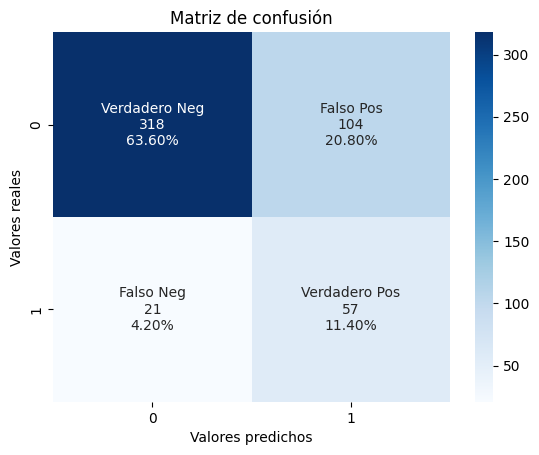

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

def cuadro_matriz_confusion(confusion):
    fig, ax = plt.subplots()

    labels = ['Verdadero Neg', 'Falso Pos', 'Falso Neg', 'Verdadero Pos']
    categories = ['0', '1']
    counts = ['{0:,}'.format(value) for value in confusion.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in confusion.flatten() / np.sum(confusion)]
    labels = [f'{label}\n{count}\n{percentage}' for label, count, percentage in zip(labels, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    sns.heatmap(confusion, annot=labels, fmt='', cmap='Blues', xticklabels=categories, yticklabels=categories, ax=ax)
    plt.xlabel('Valores predichos')
    plt.ylabel('Valores reales')
    plt.title('Matriz de confusión')
    plt.show()

cuadro_matriz_confusion(confusion)

In [136]:
def resumen_metricas(confusion, y_test):
    # Calcular las tasas de precisión, sensibilidad, especificidad y valor predictivo positivo
    accuracy = (confusion[0, 0] + confusion[1, 1]) / len(y_test)
    recall = confusion[1, 1] / (confusion[1, 1] + confusion[1, 0])
    specificity = confusion[0, 0] / (confusion[0, 0] + confusion[0, 1])
    ppv = confusion[1, 1] / (confusion[1, 1] + confusion[0, 1])

    # Mostrar las tasas de precisión, sensibilidad, especificidad y valor predictivo positivo
    print("Precisión (Accuracy):", accuracy)
    print("Sensibilidad (Recall):", recall)
    print("Especificidad:", specificity)
    print("Valor Predictivo Positivo (PPV):", ppv)

resumen_metricas(confusion, test_data_y)

Precisión (Accuracy): 0.75
Sensibilidad (Recall): 0.7307692307692307
Especificidad: 0.7535545023696683
Valor Predictivo Positivo (PPV): 0.35403726708074534


# Repetimos el proceso NORMALIZANDO los datos

In [43]:
# El primer punto es ver el formato que tienen los datos
datosfinal.dtypes

VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
IntPlan             int64
VmailPlan           uint8
Churn               uint8
dtype: object

In [44]:
datosfinal.head()

,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,IntPlan,VmailPlan,Churn
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1,0
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1,0
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1,0,0
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1,0,0


In [45]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
datosfinal_sin_columnas = ss.fit_transform(datosfinal)
datos_normalizados = pd.DataFrame(datosfinal_sin_columnas, columns = datosfinal.columns)
datos_normalizados.head()

,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,IntPlan,VmailPlan,Churn
0,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,-0.465494,0.866029,-0.085008,-0.601195,-0.085690,-0.427932,-0.327580,1.617086,-0.411672
1,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,0.147825,1.059390,1.240482,-0.601195,1.241169,-0.427932,-0.327580,1.617086,-0.411672
2,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,0.198935,-0.755571,0.703121,0.211534,0.697156,-1.188218,-0.327580,-0.618396,-0.411672
3,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,-0.078551,-0.567714,-0.078806,-1.303026,1.024263,-1.306401,0.332354,3.052685,-0.618396,-0.411672
4,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,-0.276311,1.067803,-0.276562,-0.049184,-0.601195,-0.045885,1.092641,3.052685,-0.618396,-0.411672


Todas las variables (columnas) son cantidades excepto IntPlan, VmailPlan y Churn.<br>
Este tipo de variables categóricas no deben normalizarse, por lo que recatamos su valor de la matriz de datos original:

In [46]:
datos_normalizados['IntPlan'] = datosfinal['IntPlan']
datos_normalizados['VmailPlan'] = datosfinal['VmailPlan']
datos_normalizados['Churn'] = datosfinal['Churn']
datos_normalizados.head()

,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,IntPlan,VmailPlan,Churn
0,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,-0.465494,0.866029,-0.085008,-0.601195,-0.085690,-0.427932,0,1,0
1,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,0.147825,1.059390,1.240482,-0.601195,1.241169,-0.427932,0,1,0
2,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,0.198935,-0.755571,0.703121,0.211534,0.697156,-1.188218,0,0,0
3,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,-0.078551,-0.567714,-0.078806,-1.303026,1.024263,-1.306401,0.332354,1,0,0
4,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,-0.276311,1.067803,-0.276562,-0.049184,-0.601195,-0.045885,1.092641,1,0,0


In [47]:
from sklearn.model_selection import train_test_split
y = datos_normalizados['Churn']
X = datos_normalizados.drop('Churn', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [48]:
X_train

,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,IntPlan,VmailPlan
367,-0.591760,-1.865159,1.323844,-1.865654,1.033791,0.395875,1.033976,1.070436,-0.005505,1.072574,2.780916,-0.601195,2.780325,-0.427932,0,0
3103,-0.591760,0.296091,0.526479,0.295710,0.513145,0.395875,0.514257,2.221401,0.658924,2.219559,1.061361,-1.413924,1.055408,0.332354,0,0
549,1.673277,1.052621,-1.865619,1.052889,0.091106,0.847691,0.091986,-0.082506,-0.772154,-0.083200,-0.049184,0.211534,-0.045885,1.852927,0,1
2531,-0.591760,-0.669769,1.672692,-0.669937,-0.403902,0.646884,-0.404532,-0.329707,-0.669934,-0.329297,-0.049184,-0.194831,-0.045885,-0.427932,0,0
2378,-0.591760,0.485224,1.074667,0.484734,-0.719445,-0.306949,-0.720075,-1.197875,0.045605,-1.199423,0.846417,1.024263,0.843111,1.092641,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,-0.591760,1.737537,0.974997,1.737699,-0.046944,-0.909370,-0.047225,-0.792466,-1.947682,-0.790727,-1.517970,-0.601195,-1.518698,-0.427932,0,0
1130,-0.591760,-2.656577,-1.915454,-2.656317,-0.397986,-0.557958,-0.397571,1.003198,-2.152122,1.002260,0.882241,-1.007560,0.882917,-0.427932,0,0
1294,-0.591760,-1.692553,-1.217759,-1.692831,1.203395,0.546480,1.203349,-0.321796,1.272243,-0.320508,-0.371601,0.211534,-0.377599,-0.427932,0,0
860,-0.591760,-0.010560,0.526479,-0.011051,-0.508426,1.500313,-0.508940,0.548349,-0.414384,0.549619,-0.120832,0.617898,-0.125496,0.332354,0,0


In [49]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
VMail Message,2499.0,-0.008287,0.998101,-0.591760,-0.591760,-0.591760,0.796489,3.134591
Day Mins,2499.0,0.004238,0.992617,-3.253354,-0.658752,-0.008724,0.670684,3.140422
Day Calls,2499.0,0.000166,0.994809,-3.510186,-0.619735,0.028125,0.675985,3.217588
Day Charge,2499.0,0.004233,0.992618,-3.253636,-0.659136,-0.008890,0.670519,3.140803
Eve Mins,2499.0,-0.002139,0.998469,-3.963622,-0.683946,0.000388,0.663028,3.209066
Eve Calls,2499.0,-0.008491,1.007742,-5.025911,-0.658361,-0.005739,0.671985,3.508382
Eve Charge,2499.0,-0.002134,0.998471,-3.963679,-0.684113,0.001499,0.662748,3.207980
Night Mins,2499.0,-0.004964,1.005616,-3.513648,-0.674799,0.004508,0.683815,3.839081
Night Calls,2499.0,-0.010434,0.998002,-3.429870,-0.721044,-0.005505,0.658924,3.827739
Night Charge,2499.0,-0.004982,1.005612,-3.515366,-0.674271,0.004691,0.683654,3.836763


# Regresión Logística 3

Ahora probamos la regresión logística a partir de los datos balanceados

In [50]:
RegLog = LogisticRegression(C=1.0,
                            class_weight='balanced',
                            dual=False,
                            fit_intercept=True,
                            intercept_scaling=1,
                            max_iter=100,
                            multi_class='ovr',
                            n_jobs=1,
                            penalty='l2',
                            random_state=None,
                            solver='liblinear',
                            tol=0.0001,
                            verbose=0,
                            warm_start=False)

# Aplicamos el modelo a los datos de train

RegLog.fit(X_train, y_train)
RegLog.coef_

# Realizamos la prediccion sobre los datos de test
prediccion = RegLog.predict(X_test)

# Comprobamos la precision del modelo con respecto a los datos de testeo.
precision = RegLog.score(X_test, y_test)

In [51]:
print(precision)

0.7805755395683454


In [52]:
confusion = confusion_matrix(y_test, prediccion)

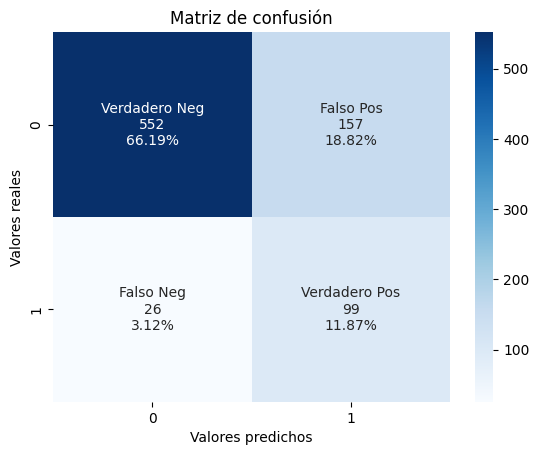

In [53]:
cuadro_matriz_confusion(confusion)

In [54]:
resumen_metricas(confusion, y_test)

Precisión (Accuracy): 0.7805755395683454
Sensibilidad (Recall): 0.792
Especificidad: 0.7785613540197461
Valor Predictivo Positivo (PPV): 0.38671875


# KNeighborsClassifier

El valor de k se puede ajustar para mejorar el rendimiento del modelo. Si se establece k en 1, el modelo utilizará solo el vecino más cercano para la predicción, pero esto puede llevar a una sobreajuste del modelo, ya que el modelo puede estar demasiado ajustado a los datos de entrenamiento.

En cambio, si se establece k en un valor demasiado grande, el modelo puede no ser lo suficientemente sensible a los detalles del conjunto de datos.

(No podemos obtener el óptimo de vecinos por el método del codo de KMeans ya que KMeans es un método para datos sin etiquetar (no supervisados)

Además, antes de aplicar KNeighborsClassifier, se recomienda normalizar los datos, ya que la distancia entre los puntos de datos es un factor importante en este algoritmo. La normalización asegura que los puntos de datos tengan la misma escala y no se vean afectados por los diferentes rangos de valores.

In [55]:
from sklearn.neighbors import KNeighborsClassifier
# Creamos el modelo
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
knn = KNeighborsClassifier(algorithm='auto',
                           leaf_size=30,
                           metric='minkowski',
                           metric_params=None,
                           n_jobs=1,
                           n_neighbors=5,
                           p=2,
                           weights='uniform')


knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=1)

In [56]:
prediccion = knn.predict(X_test)
print(prediccion)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 

In [57]:
confusion = confusion_matrix(y_test, prediccion)

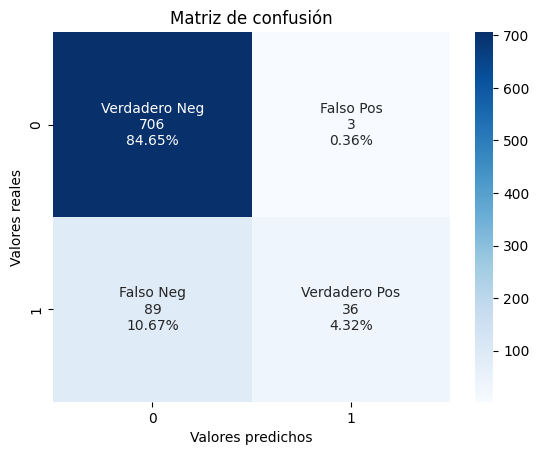

In [58]:
cuadro_matriz_confusion(confusion)

In [59]:
resumen_metricas(confusion, y_test)

Precisión (Accuracy): 0.8896882494004796
Sensibilidad (Recall): 0.288
Especificidad: 0.995768688293371
Valor Predictivo Positivo (PPV): 0.9230769230769231


# Naïve Bayes
Utiliza la probabilidad condicional para predecir la etiqueta de clase de un nuevo punto de datos.

La probabilidad condicional es la probabilidad de que un evento ocurra, dado que otro evento ya ha ocurrido. En el caso de Naive Bayes, la probabilidad condicional se utiliza para calcular la probabilidad de que un punto de datos pertenezca a una determinada clase, dadas sus características.

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

In [60]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

## Sin validación cruzada

In [61]:
y = datosfinal['Churn']
X = datosfinal.drop('Churn', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)

In [62]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [63]:
prediccion = gnb.predict(X_test)
accuracy = accuracy_score(y_test, prediccion)
print("Accuracy:", accuracy)

Accuracy: 0.8752997601918465


In [64]:
confusion = confusion_matrix(y_test, prediccion)

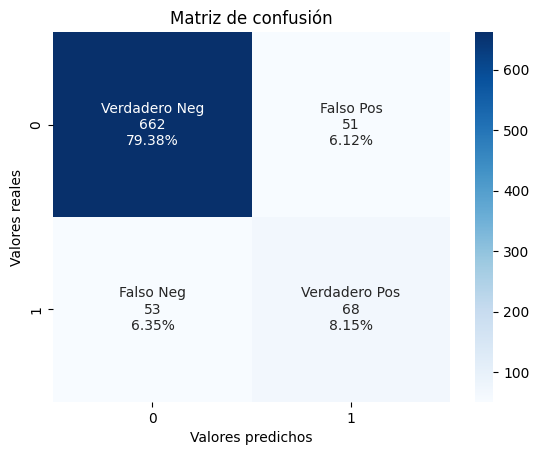

In [65]:
cuadro_matriz_confusion(confusion)

In [66]:
resumen_metricas(confusion, y_test)

Precisión (Accuracy): 0.8752997601918465
Sensibilidad (Recall): 0.5619834710743802
Especificidad: 0.9284712482468443
Valor Predictivo Positivo (PPV): 0.5714285714285714


## Con validación cruzada

Una forma de determinar la fiabilidad de los modelos es la validacion cruzada.
Este sistema hace varias particiones de los datos para fijar train y test.

In [67]:
gnb = GaussianNB()

Bayes = gnb.fit(X, y)
predicciones = gnb.predict(X)
accuracy_score(y, predicciones)

0.8676867686768677

In [68]:
print(len(predicciones))

3333


In [69]:
cross_val_score(Bayes, X, y, cv=10, scoring = "accuracy")

array([0.8502994 , 0.86227545, 0.85928144, 0.84984985, 0.86186186,
       0.86786787, 0.89489489, 0.88588589, 0.85885886, 0.85585586])

In [70]:
cross_val_score(Bayes, X, y, cv=20, scoring='precision')

array([0.33333333, 0.58333333, 0.51851852, 0.53846154, 0.5       ,
       0.52173913, 0.47058824, 0.46428571, 0.53846154, 0.52380952,
       0.71428571, 0.51851852, 0.72      , 0.5       , 0.47368421,
       0.72727273, 0.55555556, 0.48      , 0.52631579, 0.5       ])

In [71]:
cross_val_score(Bayes, X, y, cv=10, scoring='recall')

array([0.44897959, 0.57142857, 0.59183673, 0.45833333, 0.52083333,
       0.47916667, 0.66666667, 0.54166667, 0.54166667, 0.54166667])

# Árbol de decisión

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree

In [72]:
# Árboles de decisión
from sklearn import tree
from sklearn.tree import export_graphviz
from six import StringIO

In [73]:
modelo = tree.DecisionTreeClassifier(class_weight=None,
                                     criterion='gini',
                                     max_depth=5,
                                     max_features=None,
                                     max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_samples_leaf=3,
                                     min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     random_state=None,
                                     splitter='best')


In [74]:
y = datosfinal['Churn']
X = datosfinal.drop('Churn', axis = 1)
arbol = modelo.fit(X, y)

In [75]:
cross_val_score(arbol, X, y, cv=10)

array([0.93413174, 0.93113772, 0.93113772, 0.92792793, 0.93693694,
       0.92792793, 0.94294294, 0.93993994, 0.93093093, 0.94294294])

In [76]:
cross_val_score(arbol, X, y, cv=10, scoring='precision')

array([0.86486486, 0.79545455, 0.84210526, 0.875     , 0.83333333,
       0.8       , 0.89473684, 0.85714286, 0.83783784, 0.79591837])

In [77]:
cross_val_score(arbol, X, y, cv=10, scoring='recall')

array([0.65306122, 0.71428571, 0.65306122, 0.58333333, 0.72916667,
       0.66666667, 0.70833333, 0.625     , 0.64583333, 0.8125    ])

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [79]:
arbol = modelo.fit(X_train, y_train)
prediccion = arbol.predict(X_test)
accuracy_score(y_test, prediccion)

0.9364508393285371

In [80]:
confusion = confusion_matrix(y_test, prediccion)

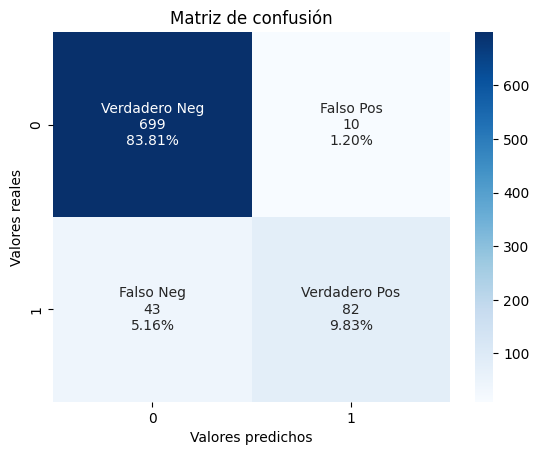

In [81]:
cuadro_matriz_confusion(confusion)

In [82]:
resumen_metricas(confusion, y_test)

Precisión (Accuracy): 0.9364508393285371
Sensibilidad (Recall): 0.656
Especificidad: 0.9858956276445698
Valor Predictivo Positivo (PPV): 0.8913043478260869


In [83]:
importanciasarbol = pd.DataFrame(arbol.feature_importances_)
importanciasarbol.index = (X.columns)
print(importanciasarbol)

                       0
VMail Message   0.000000
Day Mins        0.203378
Day Calls       0.000000
Day Charge      0.121837
Eve Mins        0.098878
Eve Calls       0.000000
Eve Charge      0.029642
Night Mins      0.017781
Night Calls     0.000000
Night Charge    0.000000
Intl Mins       0.082112
Intl Calls      0.116488
Intl Charge     0.000000
CustServ Calls  0.155705
IntPlan         0.114027
VmailPlan       0.060151


[Text(0.5961538461538461, 0.9166666666666666, 'Day Charge <= 44.805\ngini = 0.245\nsamples = 2499\nvalue = [2141, 358]\nclass = 0'),
 Text(0.3333333333333333, 0.75, 'CustServ Calls <= 3.5\ngini = 0.201\nsamples = 2333\nvalue = [2068, 265]\nclass = 0'),
 Text(0.19230769230769232, 0.5833333333333334, 'IntPlan <= 0.5\ngini = 0.145\nsamples = 2145\nvalue = [1976, 169]\nclass = 0'),
 Text(0.10256410256410256, 0.4166666666666667, 'Day Mins <= 223.25\ngini = 0.093\nsamples = 1950\nvalue = [1855, 95]\nclass = 0'),
 Text(0.05128205128205128, 0.25, 'Eve Mins <= 341.15\ngini = 0.053\nsamples = 1673\nvalue = [1627, 46]\nclass = 0'),
 Text(0.02564102564102564, 0.08333333333333333, 'gini = 0.051\nsamples = 1667\nvalue = [1623, 44]\nclass = 0'),
 Text(0.07692307692307693, 0.08333333333333333, 'gini = 0.444\nsamples = 6\nvalue = [4, 2]\nclass = 0'),
 Text(0.15384615384615385, 0.25, 'Eve Mins <= 266.7\ngini = 0.291\nsamples = 277\nvalue = [228, 49]\nclass = 0'),
 Text(0.1282051282051282, 0.083333333333

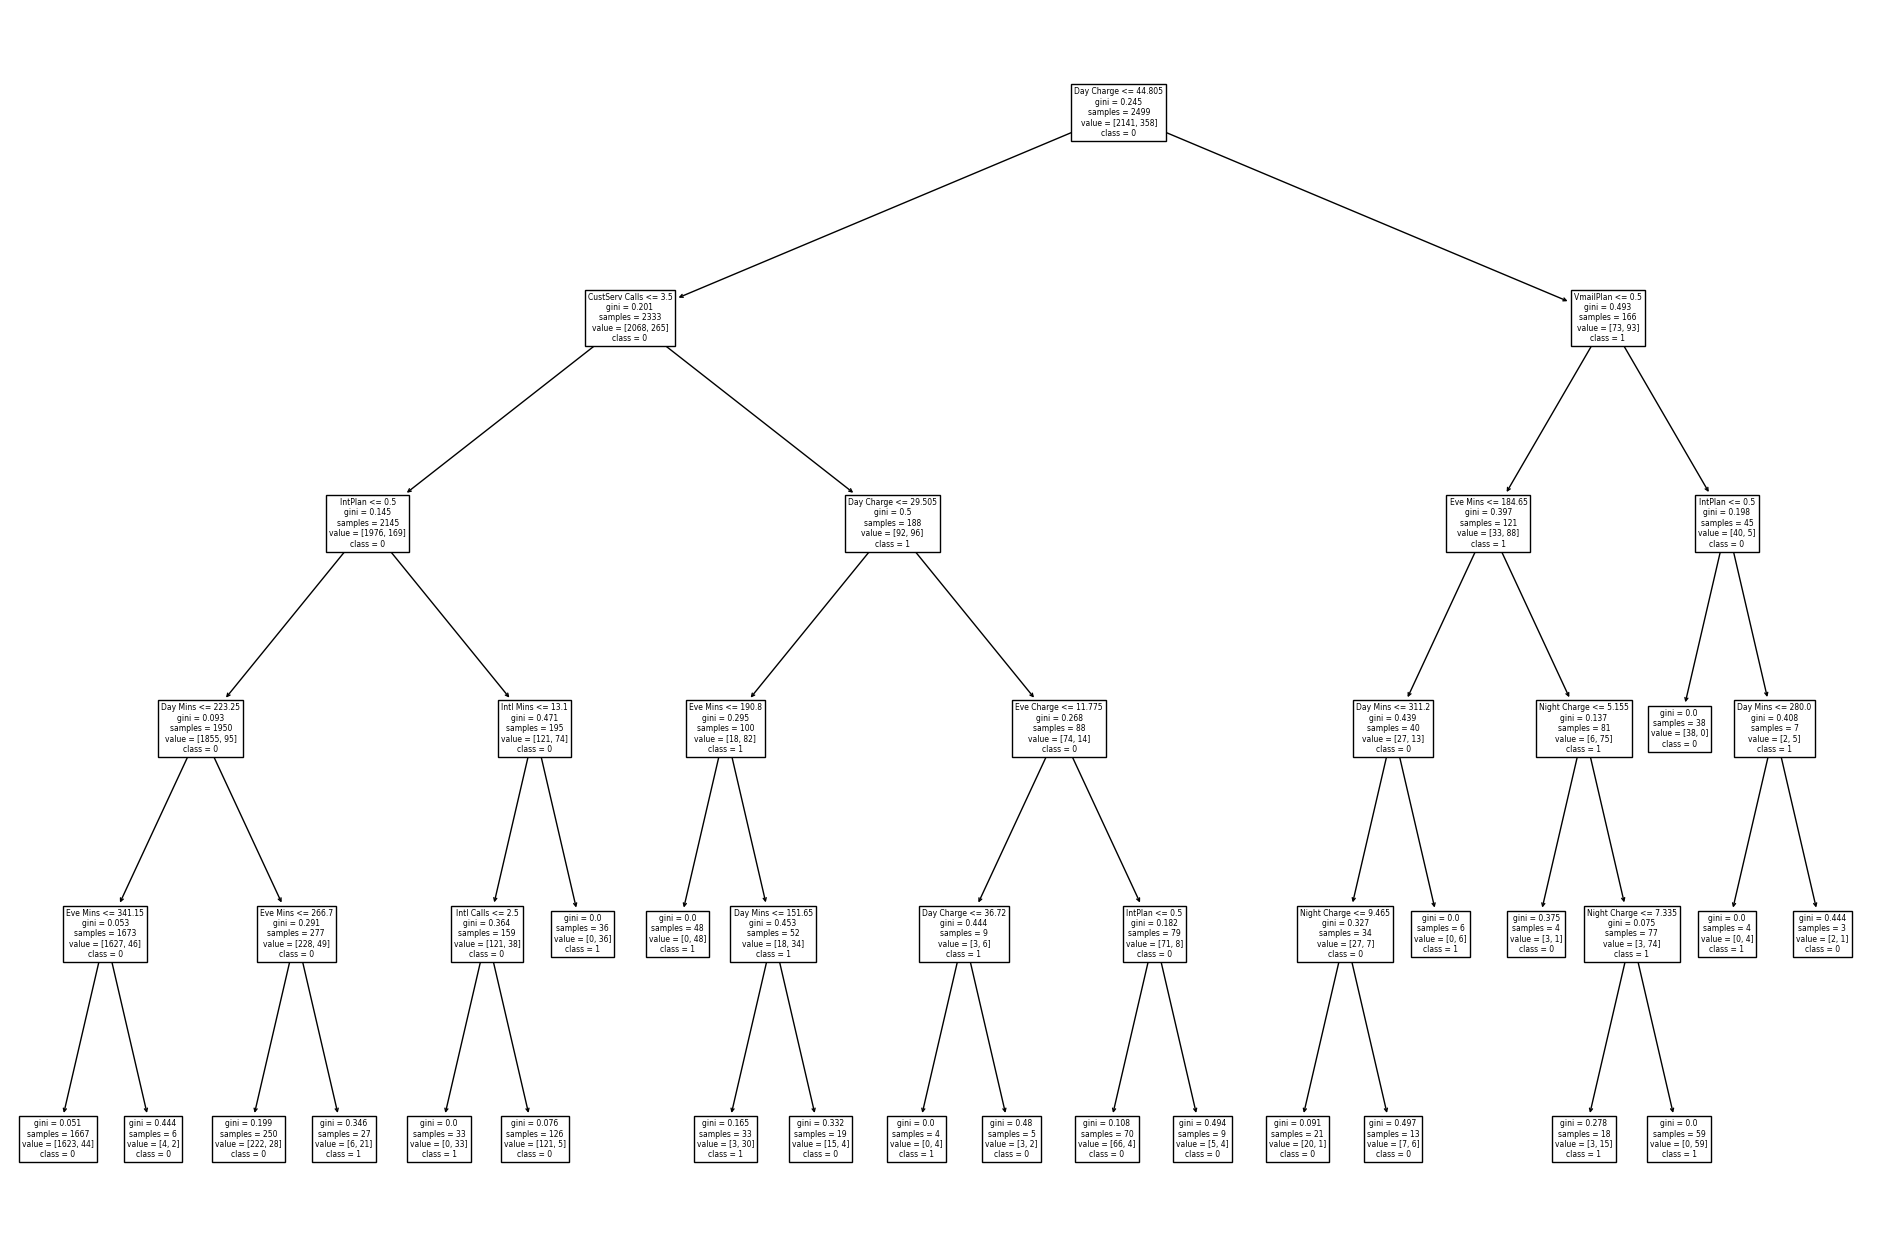

In [84]:
#Plot the tree
plt.figure(figsize=(24,16))

tree.plot_tree(arbol.fit(X_train, y_train), feature_names=X.columns,
               class_names=['0', '1'], filled=False)

# XGBoost

Documentación: https://xgboost.readthedocs.io/en/latest/python/python_api.html

In [85]:
import xgboost as xgb
# conda install -c anaconda py-xgboost

In [86]:
modelo = xgb.XGBClassifier(base_score=0.5,
                           colsample_bylevel=1,
                           colsample_bytree=1,
                           gamma=0,
                           learning_rate=0.05,
                           max_delta_step=0,
                           max_depth=5,
                           min_child_weight=1,
                           missing=1,
                           n_estimators=1000,
                           objective='binary:logistic',
                           reg_alpha=0,
                           reg_lambda=1,
                           scale_pos_weight=1,
                           seed=0,
                           verbosity=0,
                           subsample=1)

In [87]:
XGBoost = modelo.fit(X_train, y_train)
prediccion = XGBoost.predict(X_test)
accuracy_score(y_test, prediccion)

0.9484412470023981

In [88]:
confusion = confusion_matrix(y_test, prediccion)

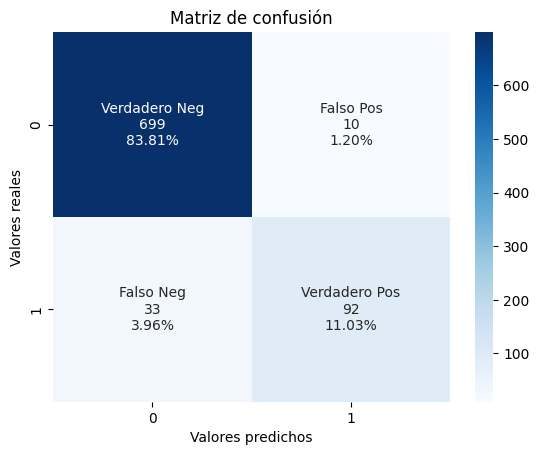

In [89]:
cuadro_matriz_confusion(confusion)

In [90]:
resumen_metricas(confusion, y_test)

Precisión (Accuracy): 0.9484412470023981
Sensibilidad (Recall): 0.736
Especificidad: 0.9858956276445698
Valor Predictivo Positivo (PPV): 0.9019607843137255
